<a href="https://colab.research.google.com/github/glublogi/dm-assign/blob/main/KNN_INTAN_202201025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [22]:
# Membaca dataset
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
# Memisahkan fitur dan target
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

In [13]:
print (x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print (y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [15]:
len (x) # menghitung jumlah karakter pada sebuah string

768

In [16]:
# Split dataset
from sklearn.model_selection import train_test_split
x_latih, x_tes, y_latih, y_tes = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
print (x_latih) # untuk training

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
762            9       89             62              0        0  22.5   
127            1      118             58             36       94  33.3   
564            0       91             80              0        0  32.4   
375           12      140             82             43      325  39.2   
663            9      145             80             46      130  37.9   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
762                     0.142   33  
127                     0.261   23  


In [18]:
print (x_tes) # untuk tes

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   
122            2      107             74             30      100  33.6   
113            4       76             62              0        0  34.0   
14             5      166             72             19      175  25.8   
529            0      111             65              0        0  24.6   
..           ...      ...            ...            ...      ...   ...   
366            6      124             72              0        0  27.6   
301            2      144             58             33      135  31.6   
382            1      109             60              8      182  25.4   
140            3      128             78              0        0  21.1   
463            5       88             78             30        0  27.6   

     DiabetesPedigreeFunction  Age  
661                     1.394   22  
122                     0.404   23  


In [19]:
len (x_latih) # menghitung jumlah karakter pada sebuah string

576

In [25]:
len (x_tes)

192

In [26]:
# Feature scalling (untuk membuat numerical pada dataset memiliki rentang nilai yang sama)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_latih = std.fit_transform(x_latih)
x_tes = std.transform(x_tes)

In [27]:
print (x_latih)

[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]


In [28]:
print (y_latih)

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64


In [29]:
print (x_tes)

[[-0.82986389  2.4576282   0.33249916 ...  1.34420526  2.78665365
  -0.96584853]
 [-0.53768687 -0.44693118  0.2272108  ...  0.17490974 -0.19434743
  -0.88246592]
 [ 0.04666716 -1.42564141 -0.40451932 ...  0.22520202 -0.23349189
  -0.71570071]
 ...
 [-0.82986389 -0.38378859 -0.50980767 ... -0.85608201  1.4406865
  -1.04923114]
 [-0.24550986  0.21606607  0.43778751 ... -1.39672402 -0.60385869
   1.7857775 ]
 [ 0.33884418 -1.04678584  0.43778751 ... -0.57947447 -0.63396981
   0.28489057]]


In [30]:
print (y_tes)

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64


In [31]:
# Training KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [32]:
# Prediksi hasil set pengujian
y_prediksi = classifier.predict(x_tes)

In [33]:
# Membuat confussion matrix (sebagai pengukur kinerja setelah mengolah data mining dengan model klasifikasi)
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_tes, y_prediksi)
print (hasil_cm)

[[114  16]
 [ 22  40]]


In [34]:
from sklearn.metrics import accuracy_score # melakukan evaluasi dengan accuracy score
print(accuracy_score(y_tes, y_prediksi)) # menampilkan accuracy score dengan data testing dan data prediksi
print ("tingkat akurasi : ", accuracy_score(y_tes, y_prediksi)*100, "%") # menampilkan tingkat akurasi dengan data testing dan data prediksi

0.8020833333333334
tingkat akurasi :  80.20833333333334 %


<ipython-input-37-0870128c8ebe>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


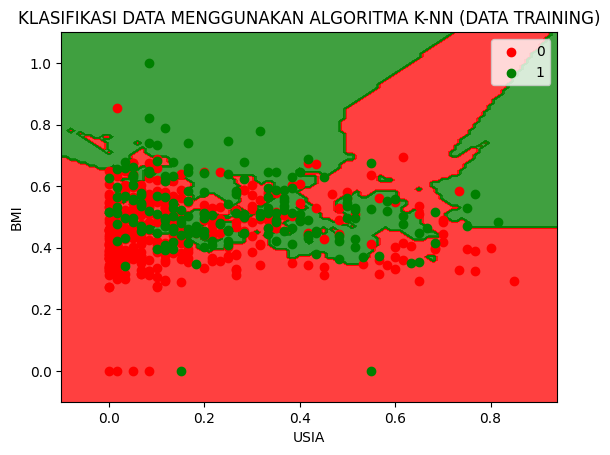

In [37]:
# Visualisasi data training
x_data, y_data = X_train_ab, y_train_ab.values
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 0.1, stop = x_data[:, 0].max() + 0.1, step = 0.01),
                           np.arange(start = x_data[:, 1].min() - 0.1, stop = x_data[:, 1].max() + 0.1, step = 0.01))

plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c = ListedColormap(('red', 'green'))(g), label = h)
plt.title('KLASIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TRAINING)')
plt.xlabel('USIA')
plt.ylabel('BMI')
plt.legend()
plt.show()

<ipython-input-38-c9df329be377>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


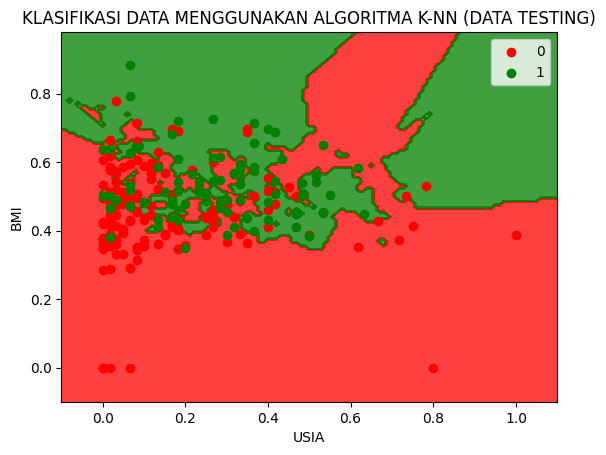

In [38]:
# Visualisasi data testing
x_data, y_data = X_test_ab, y_test_ab.values
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 0.1, stop = x_data[:, 0].max() + 0.1, step = 0.01),
                           np.arange(start = x_data[:, 1].min() - 0.1, stop = x_data[:, 1].max() + 0.1, step = 0.01))

plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c = ListedColormap(('red', 'green'))(g), label = h)
plt.title('KLASIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TESTING)')
plt.xlabel('USIA')
plt.ylabel('BMI')
plt.legend()
plt.show()
